In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

print('train shape = ', x_train.shape, ', train label shape = ', t_train.shape)
print('test shape = ', x_test.shape, ', test label shape = ', t_test.shape)

print('\n train label = ', t_train)
print(' test label = ', t_test)

train shape =  (60000, 28, 28) , train label shape =  (60000,)
test shape =  (10000, 28, 28) , test label shape =  (10000,)

 train label =  [5 0 4 ... 5 6 8]
 test label =  [7 2 1 ... 4 5 6]


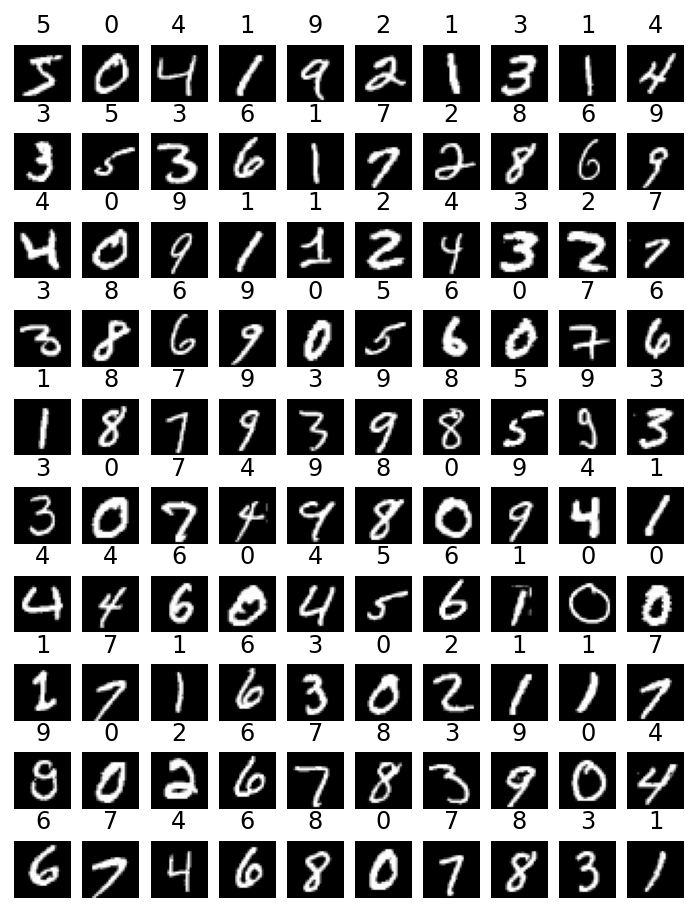

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 8))

for index in range(100): # 100개 이미지 출력
    plt.subplot(10, 10, index + 1) # 10행 10열
    plt.imshow(x_train[index], cmap='gray')
    plt.axis('off') # 축 없앰
    plt.title(str(t_train[index]))
plt.show()

In [3]:
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

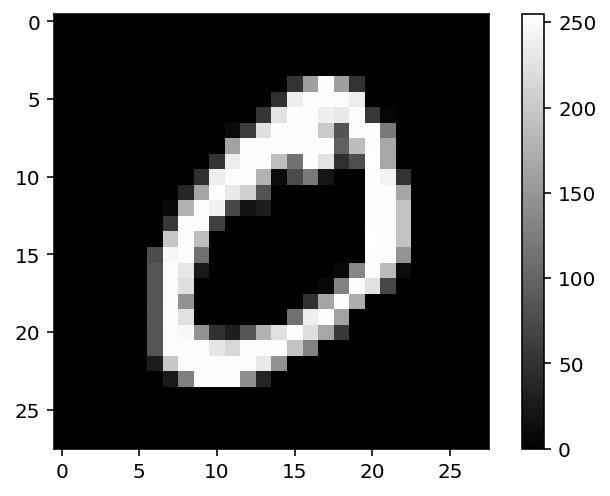

In [4]:
plt.imshow(x_train[1], cmap='gray')
plt.colorbar()
plt.show()

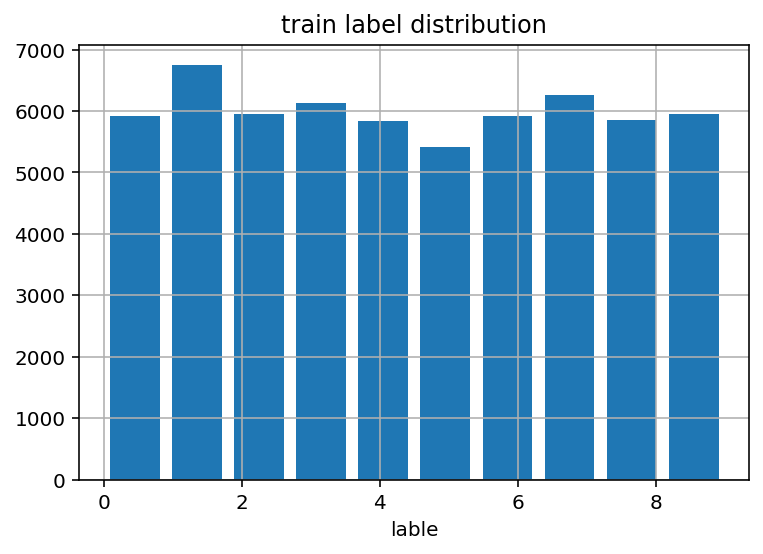

In [5]:
plt.title('train label distribution')
plt.grid()
plt.xlabel('lable')
plt.hist(t_train, bins=10, rwidth=0.8)
plt.show()

In [6]:
label_distribution = np.zeros(10)

for idx in range(len(t_train)):
    label = int(t_train[idx])
    label_distribution[label] = label_distribution[label] + 1
    
print(label_distribution)

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]


In [7]:
x_train = (x_train - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)

t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)
t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

In [12]:
print(t_train[1])
print(t_test[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [26]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [28]:
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3186 - accuracy: 0.9094 - val_loss: 0.1916 - val_accuracy: 0.9432
Epoch 2/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1451 - accuracy: 0.9583 - val_loss: 0.1473 - val_accuracy: 0.95820s - loss: 0.1490 - accu
Epoch 3/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1003 - accuracy: 0.9702 - val_loss: 0.1177 - val_accuracy: 0.9646
Epoch 4/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0759 - accuracy: 0.9773 - val_loss: 0.1127 - val_accuracy: 0.9668
Epoch 5/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0579 - accuracy: 0.9827 - val_loss: 0.1019 - val_accuracy: 0.9713
Epoch 6/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0485 - accuracy: 0.9849 - val_loss: 0.0982 - val_accuracy: 0.9717
Epoch 7/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0373 - accuracy: 0.9889 - val_loss

In [29]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1143 - accuracy: 0.9772


[0.11429671943187714, 0.9771999716758728]

In [30]:
predictions=model.predict(x_test)

In [31]:
predictions[0]

array([1.8013331e-16, 3.9787069e-18, 5.5011883e-14, 6.4388388e-08,
       1.7560586e-23, 8.8747579e-17, 4.5309747e-29, 9.9999988e-01,
       4.3513160e-14, 1.0089149e-10], dtype=float32)

In [32]:
label=np.argmax(predictions[1])
label

2

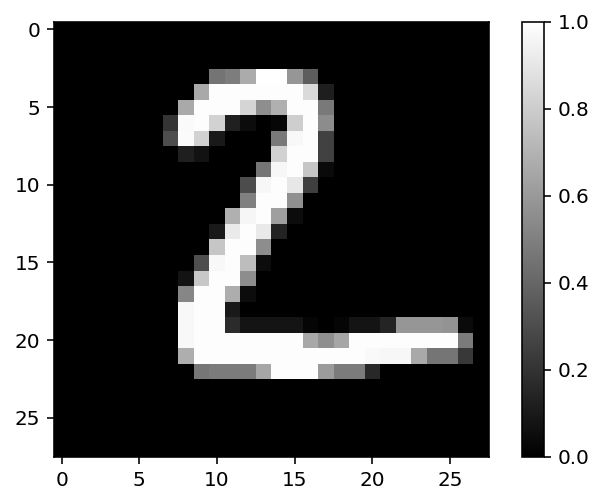

In [33]:
plt.imshow(x_test[1], cmap='gray')
plt.colorbar()
plt.show()

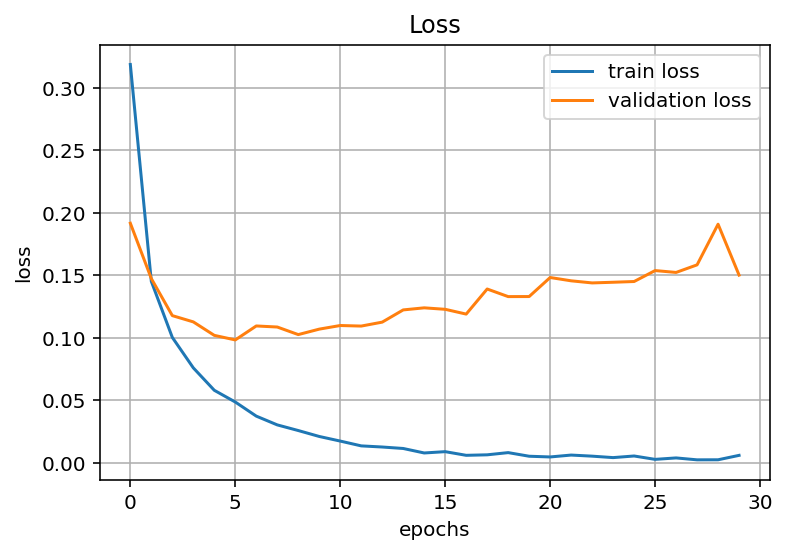

In [34]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')
plt.show()

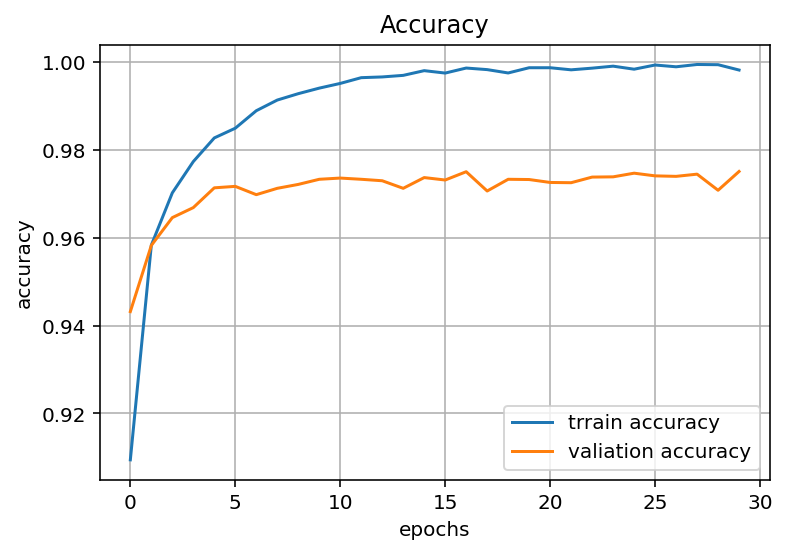

In [36]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='trrain accuracy')
plt.plot(hist.history['val_accuracy'], label='valiation accuracy')

plt.legend(loc='best')
plt.show()

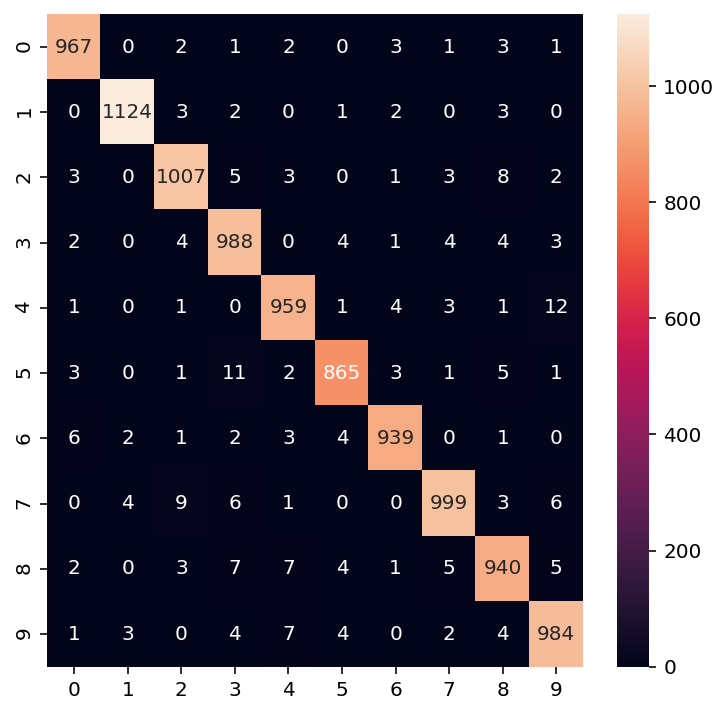

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6,6))

predicted_value = model.predict(x_test)

cm = confusion_matrix(np.argmax(t_test, axis=-1),
                     np.argmax(predicted_value, axis=-1))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [40]:
print(cm)
print('\n')

for i in range(10):
    print(('label = %d\t(%d/%d)\taccuracy = %.3f') %
         (i, np.max(cm[i]), np.sum(cm[i]),
         np.max(cm[i])/np.sum(cm[i])))

[[ 967    0    2    1    2    0    3    1    3    1]
 [   0 1124    3    2    0    1    2    0    3    0]
 [   3    0 1007    5    3    0    1    3    8    2]
 [   2    0    4  988    0    4    1    4    4    3]
 [   1    0    1    0  959    1    4    3    1   12]
 [   3    0    1   11    2  865    3    1    5    1]
 [   6    2    1    2    3    4  939    0    1    0]
 [   0    4    9    6    1    0    0  999    3    6]
 [   2    0    3    7    7    4    1    5  940    5]
 [   1    3    0    4    7    4    0    2    4  984]]


label = 0	(967/980)	accuracy = 0.987
label = 1	(1124/1135)	accuracy = 0.990
label = 2	(1007/1032)	accuracy = 0.976
label = 3	(988/1010)	accuracy = 0.978
label = 4	(959/982)	accuracy = 0.977
label = 5	(865/892)	accuracy = 0.970
label = 6	(939/958)	accuracy = 0.980
label = 7	(999/1028)	accuracy = 0.972
label = 8	(940/974)	accuracy = 0.965
label = 9	(984/1009)	accuracy = 0.975


In [43]:
# 정답 및 예측 값 분포 확인
label_distribution = np.zeros(10)
prediction_distribution = np.zeros(10)

for idx in range(len(t_test)):
    
    label = int(np.argmax(t_test[idx]))
    
    label_distribution[label] = label_distribution[label] + 1
    
    prediction = int(np.argmax(predicted_value[idx]))
    
    prediction_distribution[prediction] = prediction_distribution[prediction] + 1
    
print(label_distribution)
print(prediction_distribution)

[ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]
[ 985. 1133. 1031. 1026.  984.  883.  954. 1018.  972. 1014.]
